In [1]:
!pip install gdown
!pip install scikit-plot
import pandas as pd
import gdown
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

url1 = 'https://drive.google.com/uc?id=1utNVyw4CTI17RRZ5Y7sbnbI1Zr4m5f5F'
url2 = 'https://drive.google.com/uc?id=1D8bXCCjnlyFtm1J5eoC2IZwZ6QwQyRS0'

gdown.download(url1, 'data1.csv', quiet=False)
gdown.download(url2, 'data2.csv', quiet=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1utNVyw4CTI17RRZ5Y7sbnbI1Zr4m5f5F
To: /content/data1.csv
100%|██████████| 105k/105k [00:00<00:00, 54.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D8bXCCjnlyFtm1J5eoC2IZwZ6QwQyRS0
To: /content/data2.csv
100%|██████████| 50.3k/50.3k [00:00<00:00, 46.9MB/s]


'data2.csv'

In [2]:
df1 = pd.read_csv('/content/data1.csv')
df2 = pd.read_csv('/content/data2.csv')

In [3]:
df1.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1


In [4]:
df2.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.000,0.0,0.003,0.003,0.0,0.0,34,1.0,7,...,83,149,7,1,136,133,137,7,1,1
1,132,0.000,0.0,0.004,0.007,0.0,0.0,35,1.2,10,...,71,143,7,1,136,131,136,11,1,1
2,132,0.001,0.0,0.004,0.004,0.0,0.0,28,1.6,4,...,56,153,9,3,136,130,135,25,1,1
3,132,0.000,0.0,0.003,0.000,0.0,0.0,30,1.1,0,...,97,149,4,1,133,133,135,3,1,1
4,132,0.001,0.0,0.005,0.004,0.0,0.0,25,1.9,0,...,54,153,6,0,133,127,133,34,1,1


In [5]:
df = pd.concat([df1, df2], axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 675
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability   

In [7]:
df.nunique(axis=0)

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [8]:
X = df.iloc[:, 0:21]
y = df.iloc[:, 21:]

In [9]:
cols = ['severe_decelerations', 'prolongued_decelerations', 'histogram_tendency', 'histogram_number_of_zeroes']
for col in cols:
  print(X[col].value_counts())

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64
0.000    1948
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: prolongued_decelerations, dtype: int64
 0    1115
 1     846
-1     165
Name: histogram_tendency, dtype: int64
0     1624
1      366
2      108
3       21
5        2
4        2
10       1
8        1
7        1
Name: histogram_number_of_zeroes, dtype: int64


In [10]:
X = pd.get_dummies(X, columns = cols)

In [11]:
for col in X:
  if col not in cols:
    X[col] = MinMaxScaler().fit_transform(np.array(X[col]).reshape(-1,1))

In [12]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,...,histogram_tendency_1,histogram_number_of_zeroes_0,histogram_number_of_zeroes_1,histogram_number_of_zeroes_2,histogram_number_of_zeroes_3,histogram_number_of_zeroes_4,histogram_number_of_zeroes_5,histogram_number_of_zeroes_7,histogram_number_of_zeroes_8,histogram_number_of_zeroes_10
0,0.481481,0.315789,0.000000,0.400000,0.2,0.066667,0.279412,0.0,0.205128,0.717514,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.500000,0.157895,0.000000,0.533333,0.2,0.053333,0.279412,0.0,0.264300,0.717514,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.518519,0.157895,0.000000,0.533333,0.2,0.053333,0.323529,0.0,0.453649,0.644068,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.481481,0.368421,0.000000,0.533333,0.0,0.053333,0.323529,0.0,0.392505,0.644068,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.462963,0.263158,0.149688,0.533333,0.2,0.213333,0.176471,0.0,0.254438,0.355932,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


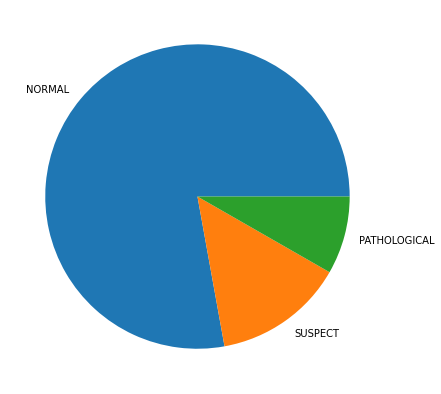

In [13]:
fetal_health = ['NORMAL', 'SUSPECT', 'PATHOLOGICAL']
data = list(y['fetal_health'].value_counts())
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = fetal_health)
 
# show plot
plt.show()

In [14]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9278996865203761


In [18]:
print(type(y_test))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [19]:
y_test

,fetal_health
669,1
1205,2
870,1
547,1
356,1
...,...
276,1
208,1
288,1
1116,1


In [20]:
y_test = y_test['fetal_health'].to_numpy()

In [21]:
y_score = clf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


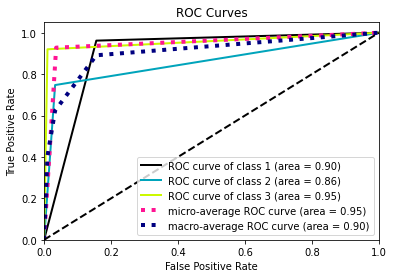

In [22]:
skplt.metrics.plot_roc_curve(y_test, y_score)
plt.show()

In [23]:
list(X.columns)

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'severe_decelerations_0.0',
 'severe_decelerations_0.001',
 'prolongued_decelerations_0.0',
 'prolongued_decelerations_0.001',
 'prolongued_decelerations_0.002',
 'prolongued_decelerations_0.003',
 'prolongued_decelerations_0.004',
 'prolongued_decelerations_0.005',
 'histogram_tendency_-1',
 'histogram_tendency_0',
 'histogram_tendency_1',
 'histogram_number_of_zeroes_0',
 'histogram_number_of_zeroes_1',
 'histogram_number_of_zeroes_2',
 'histogram_number_of_zeroes_3',
 'histogram_number_of_zeroes_4',
 'histogram_number_of_zeroes_5',
 'histogr

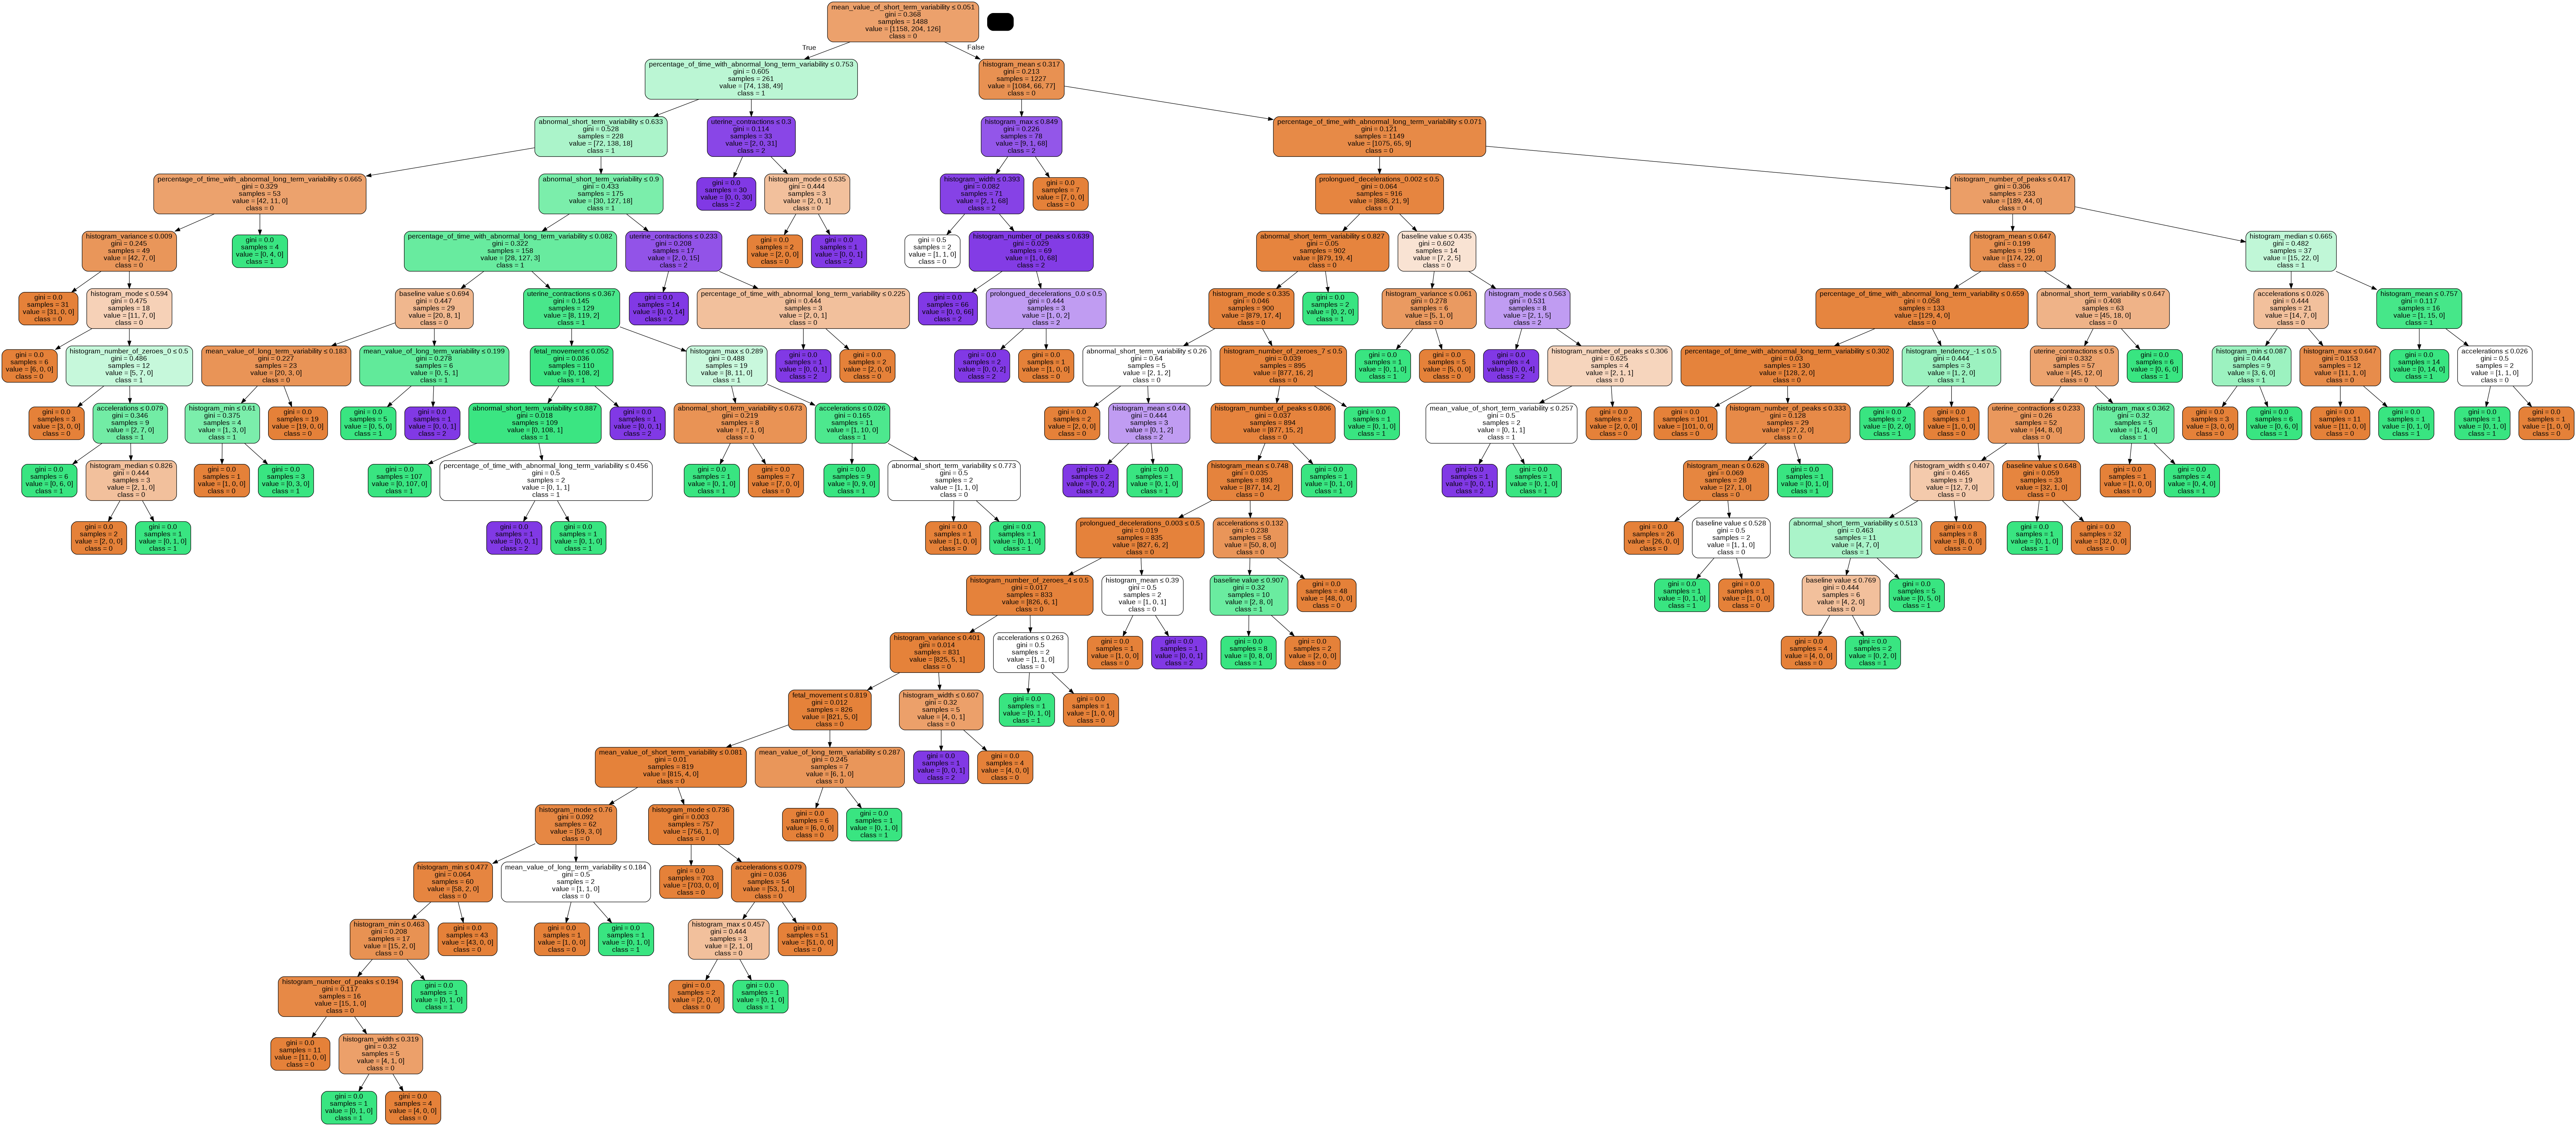

In [24]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X.columns),class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fetal_health.png')
Image(graph.create_png())

code courtesy: https://www.datacamp.com/tutorial/decision-tree-classification-python

https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

https://stackoverflow.com/questions/45376410/how-to-get-roc-curve-for-decision-tree